In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
sd=pd.read_csv('spaceserverdataset.csv')

In [4]:
sd

objid          ra        dec         u         g         r  \
0     1.237650e+18  183.531326   0.089693  19.47406  17.04240  15.94699   
1     1.237650e+18  183.598371   0.135285  18.66280  17.21449  16.67637   
2     1.237650e+18  183.680207   0.126185  19.38298  18.19169  17.47428   
3     1.237650e+18  183.870529   0.049911  17.76536  16.60272  16.16116   
4     1.237650e+18  183.883288   0.102557  17.55025  16.26342  16.43869   
...            ...         ...        ...       ...       ...       ...   
9995  1.237650e+18  131.316413  51.539547  18.81777  17.47053  16.91508   
9996  1.237650e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9997  1.237650e+18  131.552562  51.666986  18.75818  17.77784  17.51872   
9998  1.237650e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9999  1.237650e+18  131.665012  51.805307  19.27586  17.37829  16.30542   

             i         z   run  rerun  camcol  field     specobjid   class  \
0     15.50342  15.22531   752    301       4    267  3.722360e+18    STAR   
1     16.48922  16.39150   752    301       4    267  3.638140e+17    STAR   
2     17.08732  16.80125   752    301       4    268  3.232740e+17  GALAXY   
3     15.98233  15.90438   752    301       4    269  3.722370e+18    STAR   
4     16.55492  16.61326   752    301       4    269  3.722370e+18    STAR   
...        ...       ...   ...    ...     ...    ...           ...     ...   
9995  16.68305  16.50570  1345    301       3    161  5.033450e+17  GALAXY   
9996  16.71661  16.69897  1345    301       3    162  5.033400e+17  GALAXY   
9997  17.43302  17.42048  1345    301       3    162  8.222620e+18    STAR   
9998  17.36284  17.13988  1345    301       3    163  5.033400e+17  GALAXY   
9999  15.83548  15.50588  1345    301       3    163  5.033410e+17  GALAXY   

      redshift  plate    mjd  fiberid  
0    -0.000009   3306  54922      491  
1    -0.000055    323  51615      541  
2     0.123111    287  52023      513  
3    -0.000111   3306  54922      510  
4     0.000590   3306  54922      512  
...        ...    ...    ...      ...  
9995  0.027583    447  51877      246  
9996  0.117772    447  51877      228  
9997 -0.000402   7303  57013      622  
9998  0.014019    447  51877      229  
9999  0.118417    447  51877      233  

[10000 rows x 18 columns]

1. objid= Object Identifier
2. ra= J2000 Right Ascension (r-band)
3. dec = J2000 Declination (r-band)
4. u = better of DeV/Exp magnitude fit
5. g = better of DeV/Exp magnitude fit
6. r = better of DeV/Exp magnitude fit
7. i = better of DeV/Exp magnitude fit
8. z = better of DeV/Exp magnitude fit
9. run = Run Number
10. rerun = Rerun Number
11. camcol = Camera column
12. field = Field number
13. specobjid = Object Identifier
14. Class= object class (galaxy, star or quasar object). This feature of this dataset will be treated as target variable.
15. redshift = Final Redshift
16. plate = plate number
17. mjd = MJD of observation
18. fiberid = fiber ID


In [5]:
sd.shape

(10000, 18)

In [6]:
sd.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [7]:
# Dropping Down 'objid' & 'specobjid' columns as they are having very large values which cannot be understood by our machine.

sd.drop(['objid','specobjid'],axis=1, inplace=True)

In [8]:
sd.head()

ra       dec         u         g         r         i         z  \
0  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1  183.598371  0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   

   run  rerun  camcol  field   class  redshift  plate    mjd  fiberid  
0  752    301       4    267    STAR -0.000009   3306  54922      491  
1  752    301       4    267    STAR -0.000055    323  51615      541  
2  752    301       4    268  GALAXY  0.123111    287  52023      513  
3  752    301       4    269    STAR -0.000111   3306  54922      510  
4  752    301       4    269    STAR  0.000590   3306  54922      512

In [9]:
sd.shape

(10000, 16)

In [10]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   rerun     10000 non-null  int64  
 9   camcol    10000 non-null  int64  
 10  field     10000 non-null  int64  
 11  class     10000 non-null  object 
 12  redshift  10000 non-null  float64
 13  plate     10000 non-null  int64  
 14  mjd       10000 non-null  int64  
 15  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(7), object(1)
memory usage: 1.2+ MB


In [11]:
# checking for any null values in the data.
sd.isna().sum()

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
run         0
rerun       0
camcol      0
field       0
class       0
redshift    0
plate       0
mjd         0
fiberid     0
dtype: int64

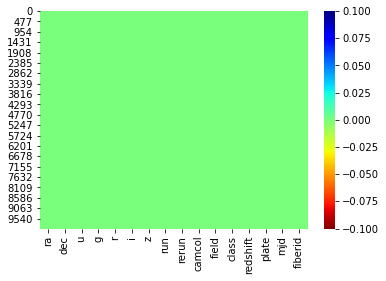

In [12]:
sns.heatmap(sd.isnull(),cmap='jet_r')

# Visualization

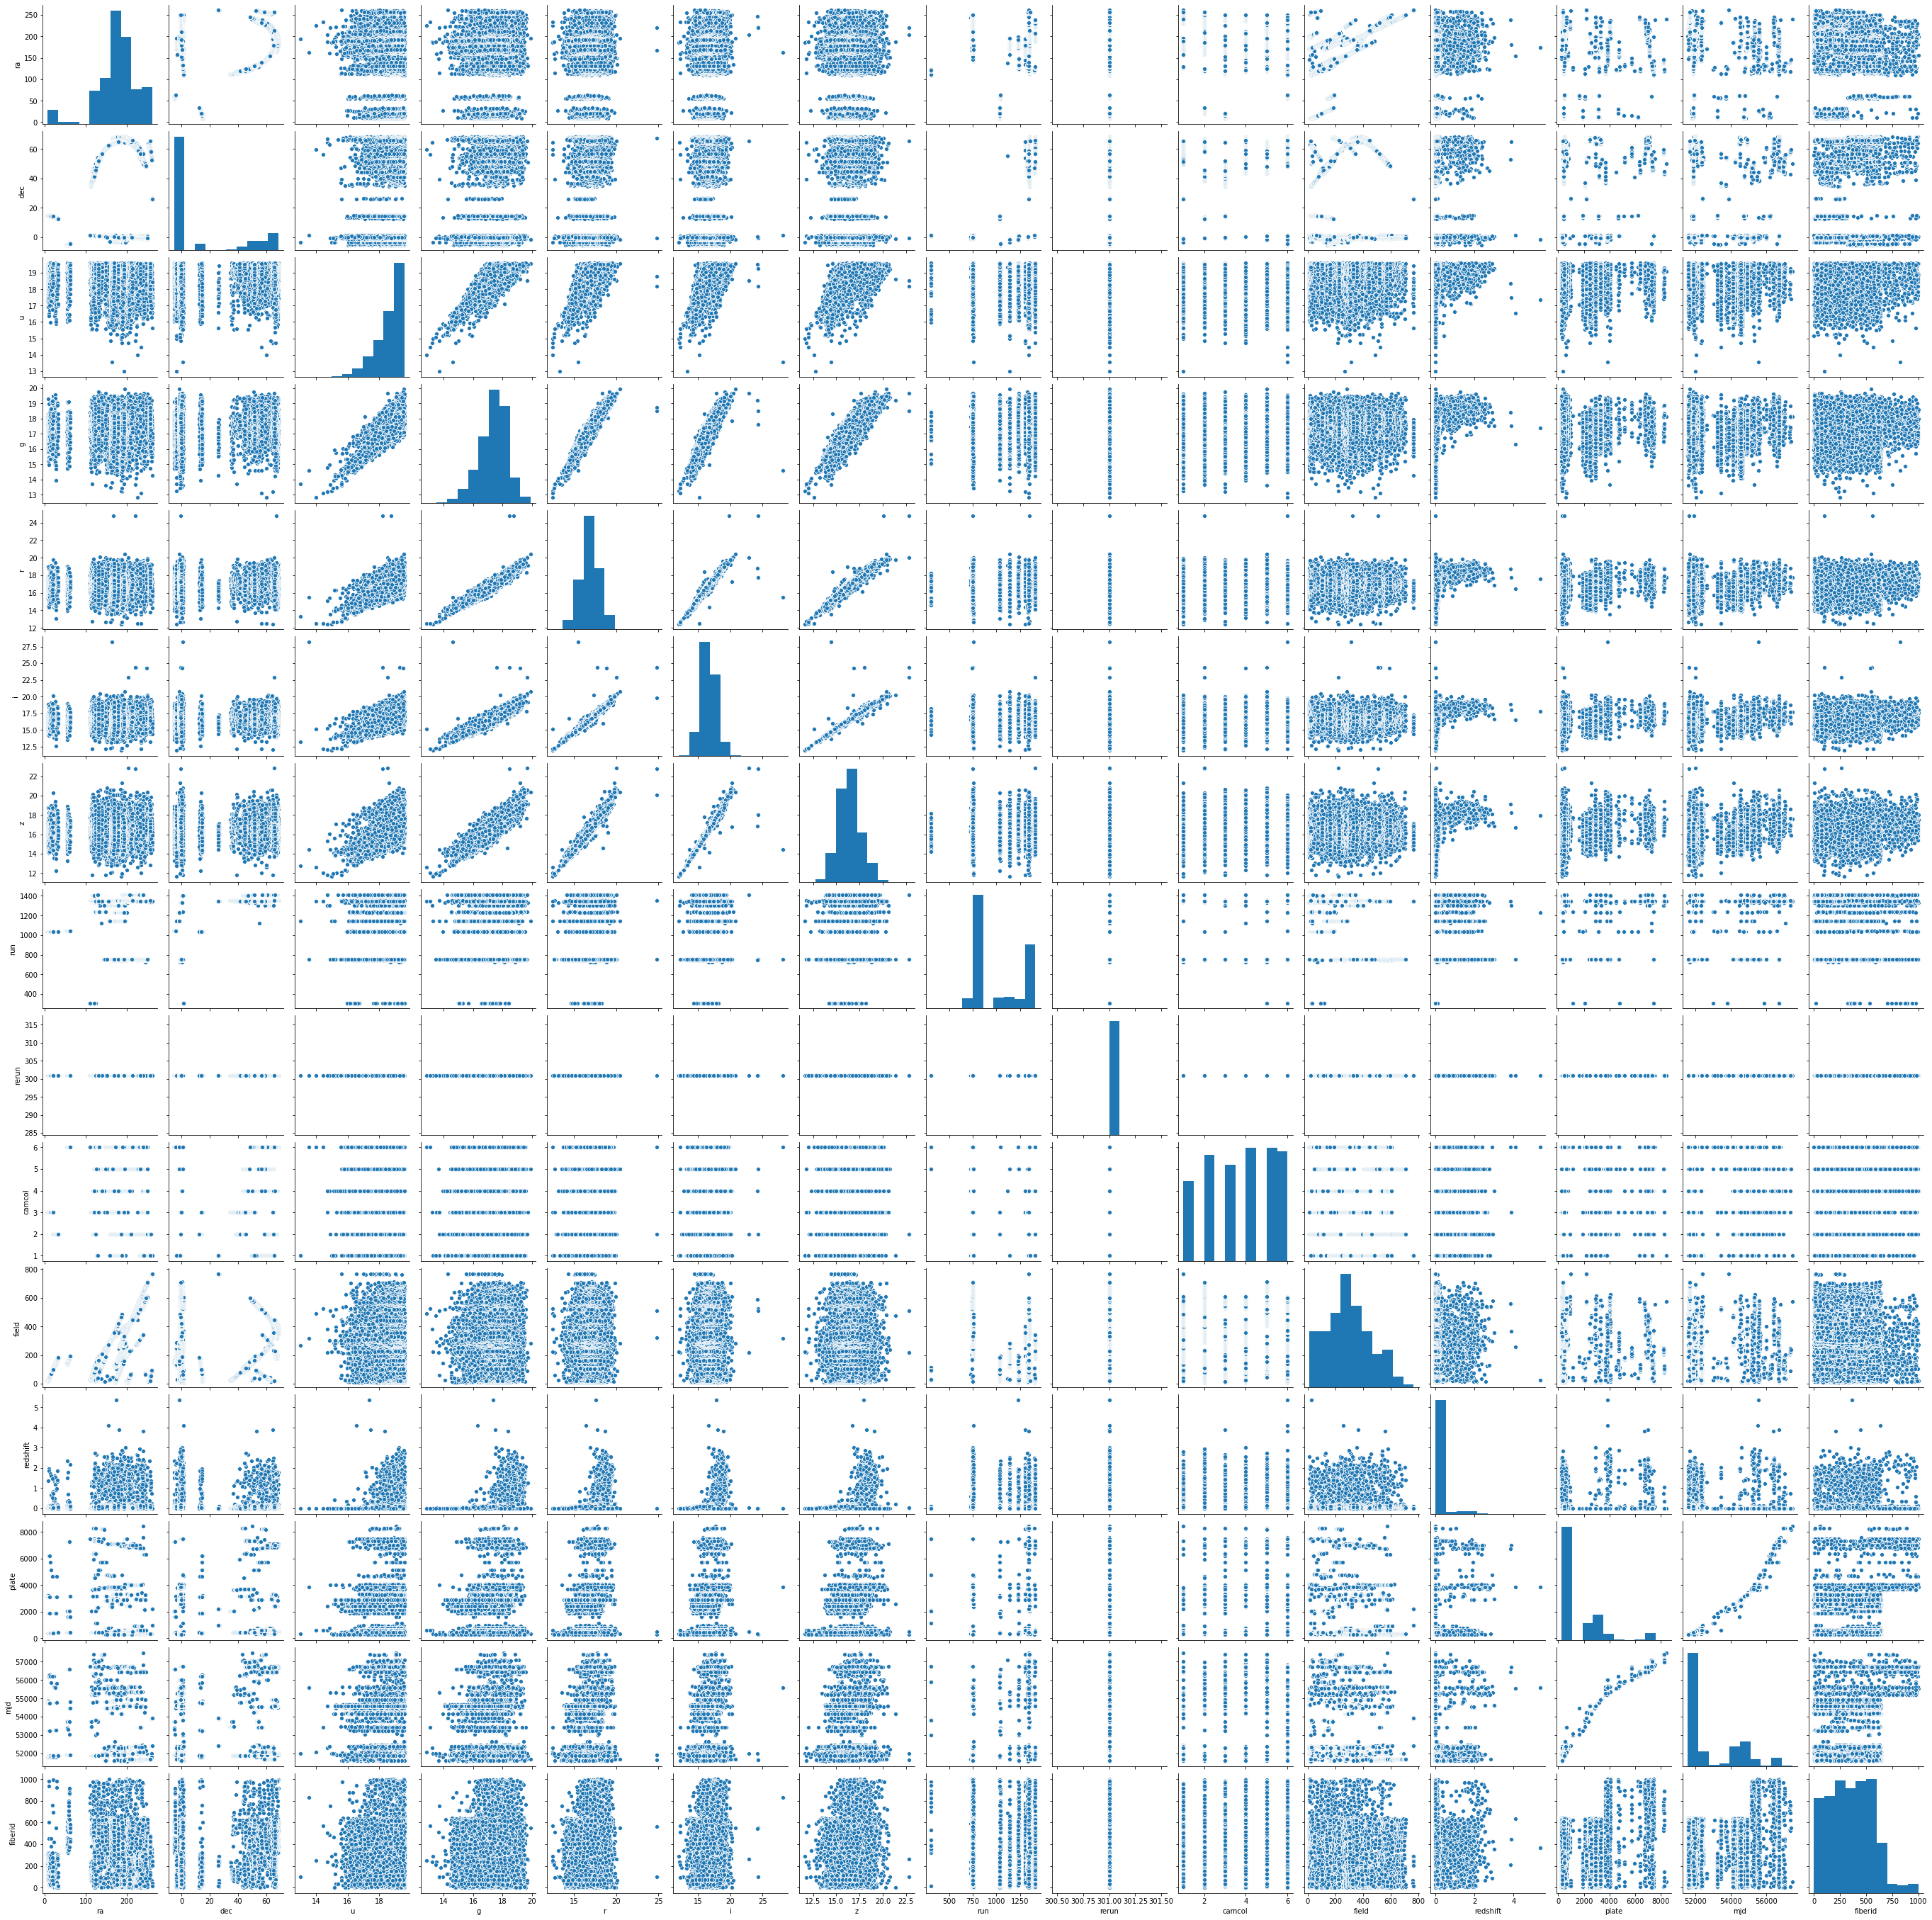

In [13]:
sns.pairplot(sd)

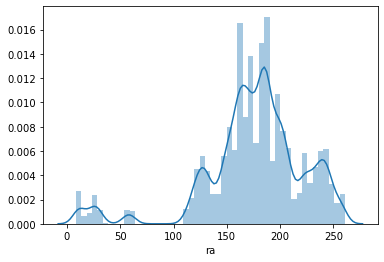

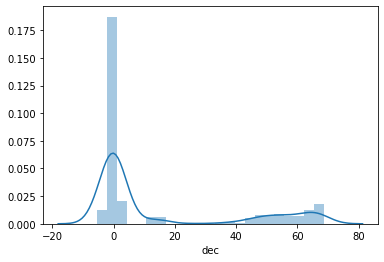

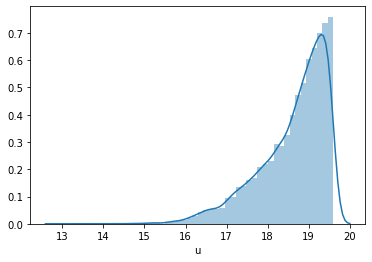

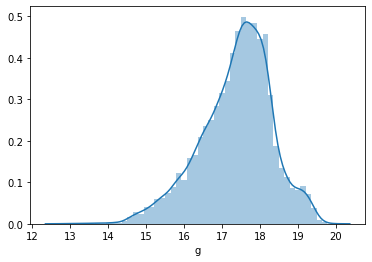

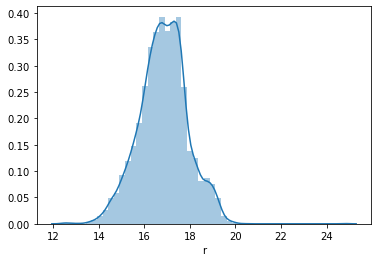

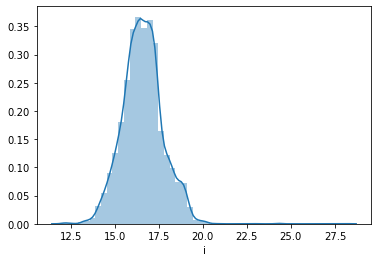

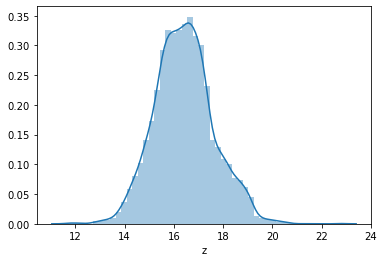

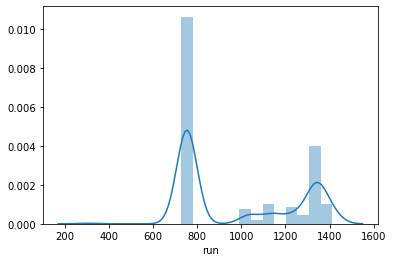

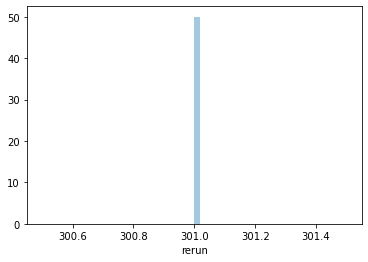

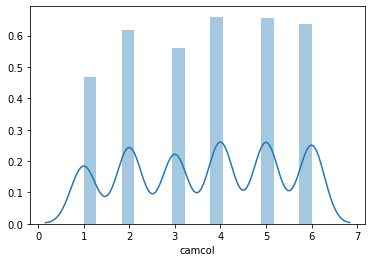

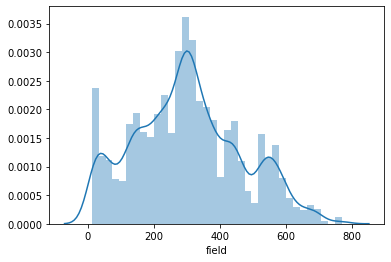

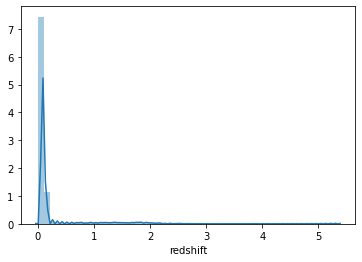

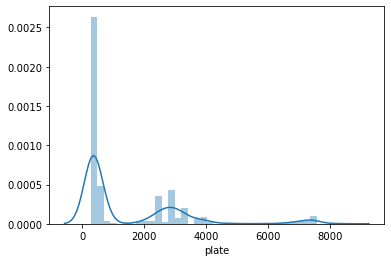

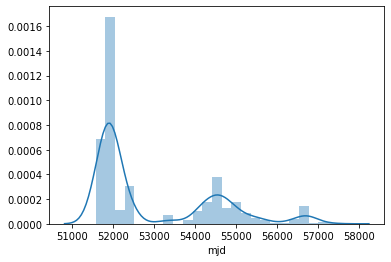

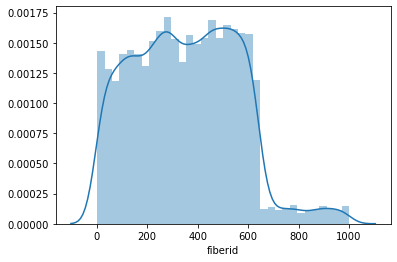

In [14]:
for g in sd.describe().columns:
    sns.distplot(sd[g])
    plt.show()

Observations:

1. dec,redshift and mjd is rightly skewed 
2. u,g is left skewed
3. i,z,field,fiberid is normal skewed.

After checking for null values in dataset we found that there is are no null values.

In [15]:
sd['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In class we can see there are 3 categories 1. Galaxy 2. Star 3. QSO(quasar)

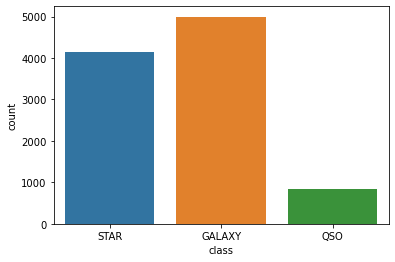

In [16]:
sns.countplot(x=sd['class'])

Observation

In class feature  galaxy category  has max count than STAR,QSO.

In [17]:
# Applying Label Encoder on the class feature to convert its categorical data to machine understandable language.1

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()

In [20]:
sd['class']=le.fit_transform(sd['class'].astype(str))

In [21]:
sd

ra        dec         u         g         r         i         z  \
0     183.531326   0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1     183.598371   0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2     183.680207   0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3     183.870529   0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4     183.883288   0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   
...          ...        ...       ...       ...       ...       ...       ...   
9995  131.316413  51.539547  18.81777  17.47053  16.91508  16.68305  16.50570   
9996  131.306083  51.671341  18.27255  17.43849  17.07692  16.71661  16.69897   
9997  131.552562  51.666986  18.75818  17.77784  17.51872  17.43302  17.42048   
9998  131.477151  51.753068  18.88287  17.91068  17.53152  17.36284  17.13988   
9999  131.665012  51.805307  19.27586  17.37829  16.30542  15.83548  15.50588   

       run  rerun  camcol  field  class  redshift  plate    mjd  fiberid  
0      752    301       4    267      2 -0.000009   3306  54922      491  
1      752    301       4    267      2 -0.000055    323  51615      541  
2      752    301       4    268      0  0.123111    287  52023      513  
3      752    301       4    269      2 -0.000111   3306  54922      510  
4      752    301       4    269      2  0.000590   3306  54922      512  
...    ...    ...     ...    ...    ...       ...    ...    ...      ...  
9995  1345    301       3    161      0  0.027583    447  51877      246  
9996  1345    301       3    162      0  0.117772    447  51877      228  
9997  1345    301       3    162      2 -0.000402   7303  57013      622  
9998  1345    301       3    163      0  0.014019    447  51877      229  
9999  1345    301       3    163      0  0.118417    447  51877      233  

[10000 rows x 16 columns]

In [22]:
sd['class'].value_counts()

0    4998
2    4152
1     850
Name: class, dtype: int64

In [23]:
sd['run'].value_counts()

756     3060
752     2086
1345     915
1350     540
1140     527
745      453
1035     396
1412     347
1302     246
1331     245
1231     245
1334     212
1239     197
1336     182
1404     137
1045     112
1402      49
308       31
1411      10
1356       4
727        4
1119       1
1332       1
Name: run, dtype: int64

In [24]:
sd['rerun'].value_counts()
# we can see that in 'rerun' there is a similar data which will not help our machine to learn. Its better to clean our data.

301    10000
Name: rerun, dtype: int64

In [25]:
# Dropping rerun feature from the our dataset

sd.drop(['rerun'],axis=1, inplace=True)

In [26]:
sd

ra        dec         u         g         r         i         z  \
0     183.531326   0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1     183.598371   0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2     183.680207   0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3     183.870529   0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4     183.883288   0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   
...          ...        ...       ...       ...       ...       ...       ...   
9995  131.316413  51.539547  18.81777  17.47053  16.91508  16.68305  16.50570   
9996  131.306083  51.671341  18.27255  17.43849  17.07692  16.71661  16.69897   
9997  131.552562  51.666986  18.75818  17.77784  17.51872  17.43302  17.42048   
9998  131.477151  51.753068  18.88287  17.91068  17.53152  17.36284  17.13988   
9999  131.665012  51.805307  19.27586  17.37829  16.30542  15.83548  15.50588   

       run  camcol  field  class  redshift  plate    mjd  fiberid  
0      752       4    267      2 -0.000009   3306  54922      491  
1      752       4    267      2 -0.000055    323  51615      541  
2      752       4    268      0  0.123111    287  52023      513  
3      752       4    269      2 -0.000111   3306  54922      510  
4      752       4    269      2  0.000590   3306  54922      512  
...    ...     ...    ...    ...       ...    ...    ...      ...  
9995  1345       3    161      0  0.027583    447  51877      246  
9996  1345       3    162      0  0.117772    447  51877      228  
9997  1345       3    162      2 -0.000402   7303  57013      622  
9998  1345       3    163      0  0.014019    447  51877      229  
9999  1345       3    163      0  0.118417    447  51877      233  

[10000 rows x 15 columns]

In [27]:
sd['camcol'].value_counts()

4    1834
5    1827
6    1769
2    1712
3    1560
1    1298
Name: camcol, dtype: int64

In [28]:
sd['field'].value_counts()

301    62
302    58
304    56
305    55
309    54
       ..
499     1
676     1
507     1
660     1
503     1
Name: field, Length: 703, dtype: int64

In [29]:
sd['plate'].value_counts()

2558    222
2559    221
2895    166
276     156
7456    139
       ... 
7319      1
2952      1
7090      1
7562      1
1635      1
Name: plate, Length: 487, dtype: int64

In [30]:
sd['mjd'].value_counts()

52000    312
54140    222
51909    222
54208    221
51908    214
        ... 
53299      1
55618      1
56991      1
51696      1
53053      1
Name: mjd, Length: 355, dtype: int64

In [31]:
sd['fiberid'].value_counts()

155    29
138    28
454    27
249    26
11     26
       ..
866     1
858     1
850     1
842     1
915     1
Name: fiberid, Length: 892, dtype: int64

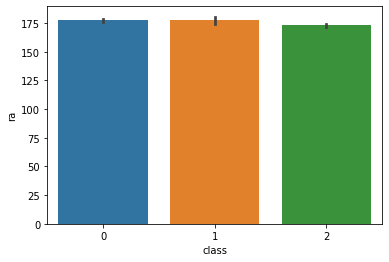

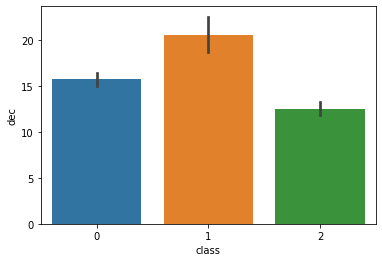

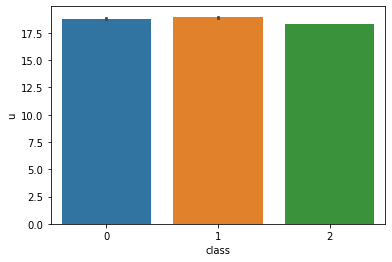

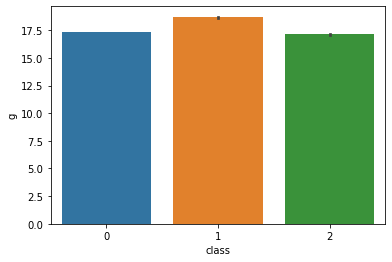

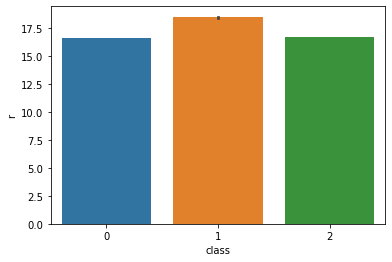

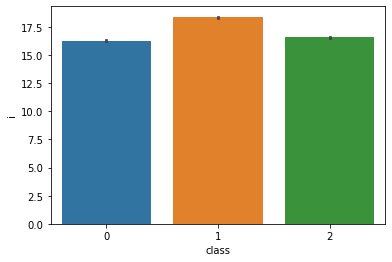

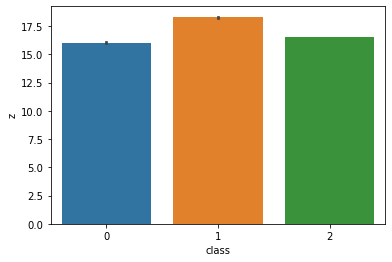

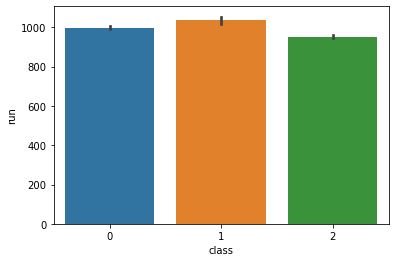

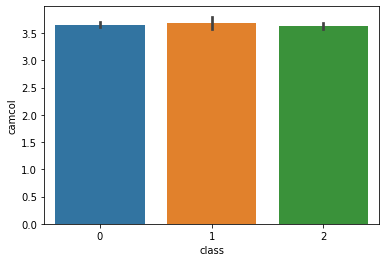

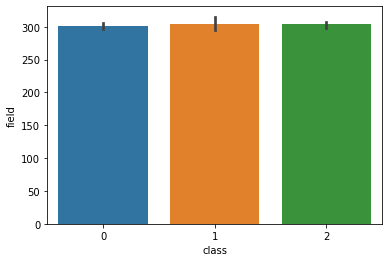

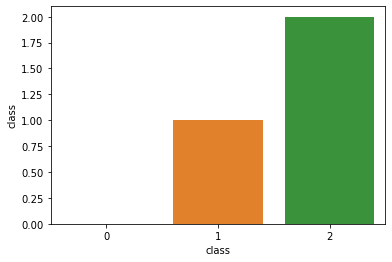

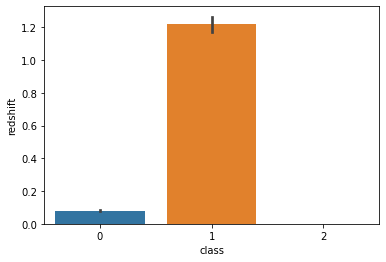

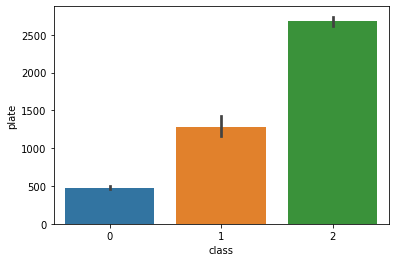

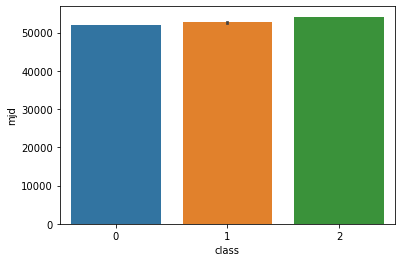

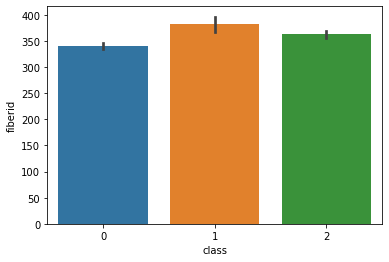

In [32]:
for i in sd.columns:
    sns.barplot(x='class',y=i,data=sd)
    plt.show()

Observations:
    
1. camcol,rerun,field,mjd is same in all three categories of class column.
2. ra and u are showing same no in all three categories of class column.
3. In dec feature  stars are highly in respect to galaxy and qso.
4. In g,r,i feature stars are slighly high than galaxy and qso. but galaxy are qso are same.
5. In redshift feature we can see a high no of stars involvement and very low of galaxy. qso is absent in it.
6. In plate feature we can see a large numbers of QSO followed by STARS and then GALAXY.


In [33]:
sd.describe()

ra           dec             u             g             r  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean     175.529987     14.836148     18.619355     17.371931     16.840963   
std       47.783439     25.212207      0.828656      0.945457      1.067764   
min        8.235100     -5.382632     12.988970     12.799550     12.431600   
25%      157.370946     -0.539035     18.178035     16.815100     16.173333   
50%      180.394514      0.404166     18.853095     17.495135     16.858770   
75%      201.547279     35.649397     19.259232     18.010145     17.512675   
max      260.884382     68.542265     19.599900     19.918970     24.802040   

                  i             z           run        camcol         field  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      16.583579     16.422833    981.034800      3.648700    302.380100   
std        1.141805      1.203188    273.305024      1.666183    162.577763   
min       11.947210     11.610410    308.000000      1.000000     11.000000   
25%       15.853705     15.618285    752.000000      2.000000    184.000000   
50%       16.554985     16.389945    756.000000      4.000000    299.000000   
75%       17.258550     17.141447   1331.000000      5.000000    414.000000   
max       28.179630     22.833060   1412.000000      6.000000    768.000000   

              class      redshift         plate           mjd       fiberid  
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000  
mean       0.915400      0.143726   1460.986400  52943.533300    353.069400  
std        0.952856      0.388774   1788.778371   1511.150651    206.298149  
min        0.000000     -0.004136    266.000000  51578.000000      1.000000  
25%        0.000000      0.000081    301.000000  51900.000000    186.750000  
50%        1.000000      0.042591    441.000000  51997.000000    351.000000  
75%        2.000000      0.092579   2559.000000  54468.000000    510.000000  
max        2.000000      5.353854   8410.000000  57481.000000   1000.000000

In [34]:
sd.skew()

ra         -1.227350
dec         1.191544
u          -1.219795
g          -0.536293
r          -0.021673
i           0.286442
z           0.214313
run         0.412555
camcol     -0.100220
field       0.249795
class       0.169292
redshift    4.265729
plate       1.794609
mjd         1.039610
fiberid     0.308053
dtype: float64

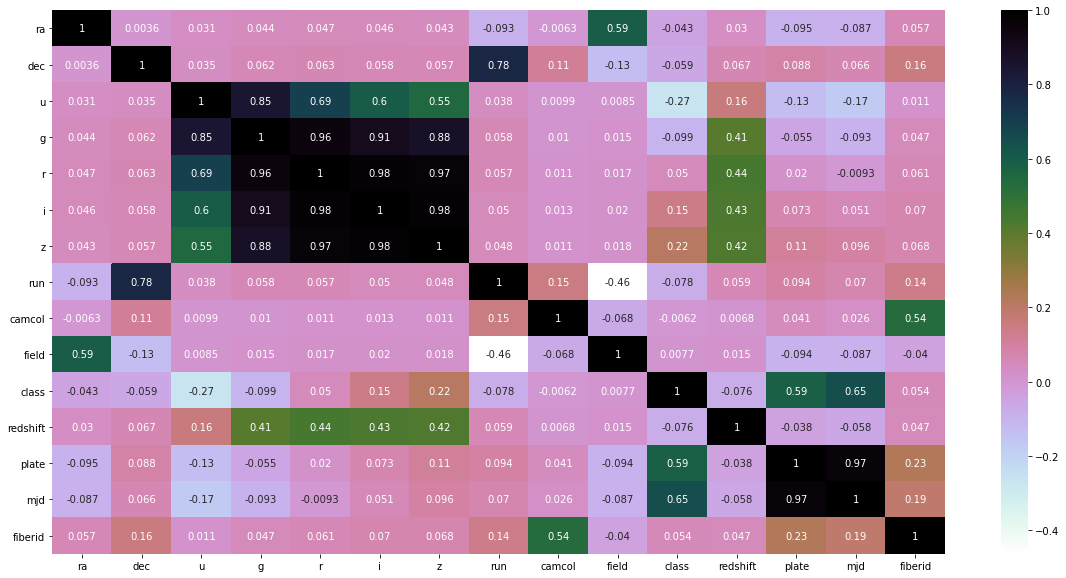

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(sd.corr(),annot=True,cmap='cubehelix_r')

Observations:

1. u,g,r,i,z are positively correlated with each other.
2. dec and run are positively correlated with each other.
3. ra and field are positively correlated with each other.
4. plate  and mjd are positively correlated.

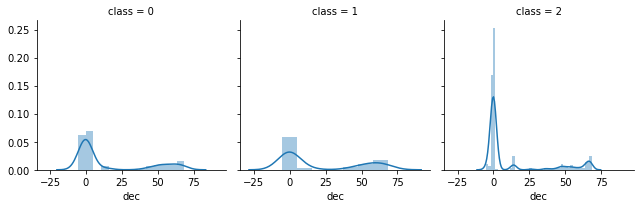

In [36]:
#Facegrid
face=sns.FacetGrid(sd,col='class')
face.map(sns.distplot,'dec')
plt.show()


In class 0,1,2 dec is the range from -25 to 25.

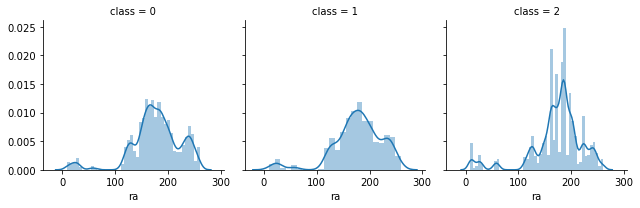

In [37]:
face=sns.FacetGrid(sd,col='class')
face.map(sns.distplot,'ra')
plt.show()

As from above we can see in ra feature values are in the range from 100-300 for the class 0,1,2.

As we observed that out data is very big with 10000 rows so it is quite difficult to visualize plots and  learn from it. so would take a sample of above data  to analyze.

In [43]:
sdd=sd.head(150)
sdd

ra       dec         u         g         r         i         z  \
0    183.531326  0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1    183.598371  0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2    183.680207  0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3    183.870529  0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4    183.883288  0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   
..          ...       ...       ...       ...       ...       ...       ...   
145  162.598510 -0.990874  18.02848  16.65369  16.06824  15.82721  15.70943   
146  162.611024 -0.890845  17.33813  15.96866  15.49672  15.33282  15.27834   
147  162.547150 -1.002057  19.48367  18.19980  17.55522  17.15322  16.93752   
148  162.667396 -0.900917  16.52364  15.40187  15.08259  14.97577  14.95088   
149  218.729172  0.458112  16.97457  15.78590  15.32505  15.16091  15.08877   

     run  camcol  field  class  redshift  plate    mjd  fiberid  
0    752       4    267      2 -0.000009   3306  54922      491  
1    752       4    267      2 -0.000055    323  51615      541  
2    752       4    268      0  0.123111    287  52023      513  
3    752       4    269      2 -0.000111   3306  54922      510  
4    752       4    269      2  0.000590   3306  54922      512  
..   ...     ...    ...    ...       ...    ...    ...      ...  
145  756       1    312      2 -0.000038   2389  54213       43  
146  756       1    312      2 -0.000047   2389  54213       55  
147  756       1    312      0  0.104561    275  51910        7  
148  756       1    313      2  0.000263   2559  54208       58  
149  752       5    502      2 -0.000006    307  51663      391  

[150 rows x 15 columns]

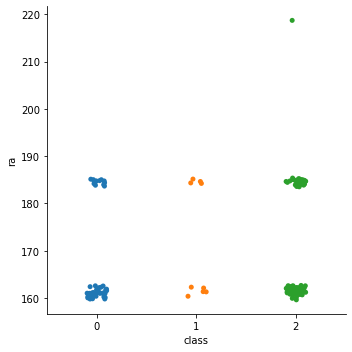

In [45]:
sns.catplot(x='class',y='ra',data=sdd)

For class- galaxy(0), ra values at 160  are concentrated. For class - QSO(1), we see concentrated scattering of values at 160 as well as little bit of scatter values at 185. For class - STAR(2) we see concentrated scattering of values from 160 as well as little bit of scatter values at 185. From all above we observe that galaxy values are more than other two..

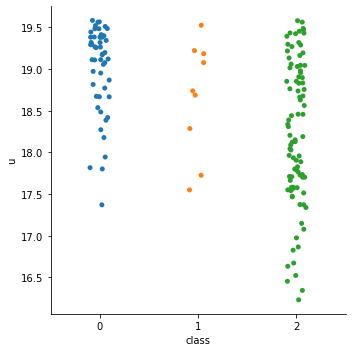

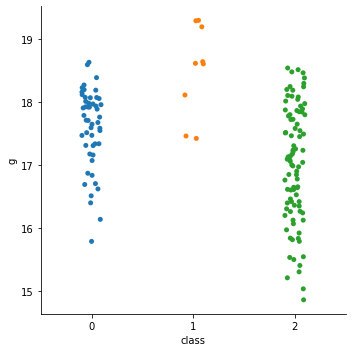

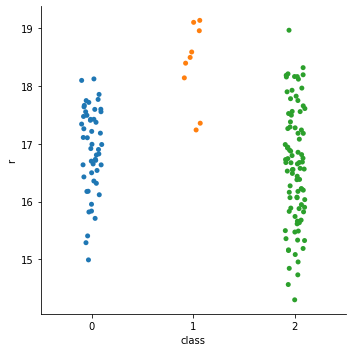

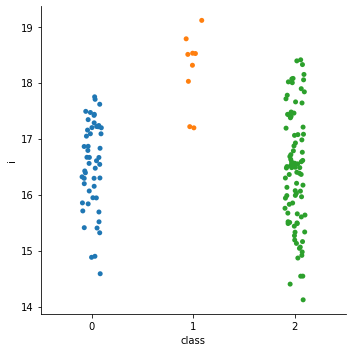

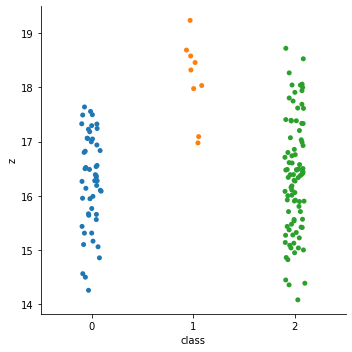

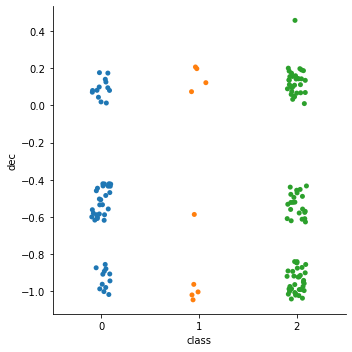

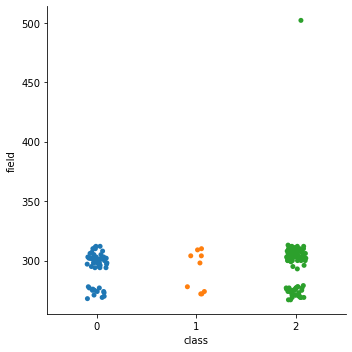

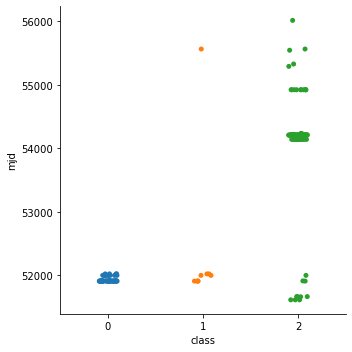

In [55]:
list=['u','g','r','i','z','dec','field','mjd']
for i in list:
    sns.catplot(x='class',y=i,data=sdd)
    plt.show()

Here in the plot of u: We see that the data for class 0: Galaxy is mostly lying between the range 19-19.5. For class 2: Star the data is concentrated between 17.4-19.5. For class 1:QSO we hardly see few points between 17.5-19.5.

For plot of g: The data for class 0 lies in the range 16-18.5. the data for class 2 lies in the range 15-18.5. and data for class 1 lies between 17.5-19.5.

For plot of r: We can see points concentrated between 16-18 for class:0. We see points concentrated for class 1 between 18-19.5. For class 2 point are scattered moslty between 15.5-18.5.

For plot of i: Data for class 0 is lying mostly in between the values of 15.5-17.5. For class 1 data is somewhere b/w 18-19. for class 2 data lies between 15-18.5.

For plot of z: Data for class 0 can be seen between  15-17.5. Data for class 1 can be seen between 18-19. Data for class 2 can be seen between 15-18.5.


For dec- We have a scattered data of class Galaxy and Star around -0.6 to -0.4 declination and also from -1.0 to -0.8. Class 1-QSO is mostly seen around the range 0.0 to 0.2.

For field-  We can observe the data for class 0  is concentrated  at 300. The data for class 1 is spread across the field values 250-310 & for class 2 data is spread in the range 250-310.

For mjd(modified julian date)- For class 0 was taken at the modified date 52000. class 1 at 52000. For class 2 ranges from 51500-52000, between 54000-56000.

<Figure size 1080x720 with 0 Axes>

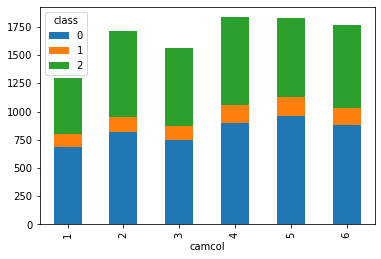

In [52]:
plt.figure(figsize=(15,10))
k.plot(kind='bar',stacked=True)

In [50]:
k=pd.crosstab(sd['camcol'],sd['class'])
print(k)

class     0    1    2
camcol               
1       687  114  497
2       818  136  758
3       752  118  690
4       901  161  772
5       957  170  700
6       883  151  735


camcol value 5 results the maximum time for class Galaxy(0) and for QSO(1) aswell.
camcol value 4 results the maximum times for class STARS(2).

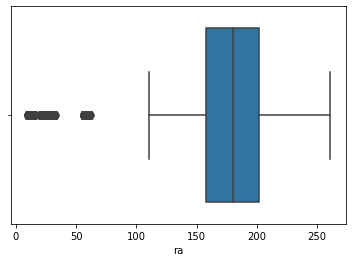

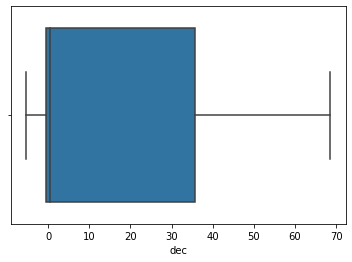

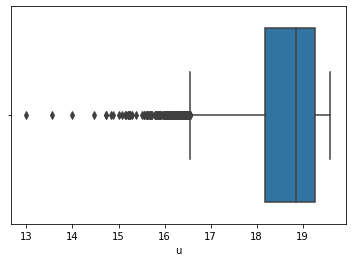

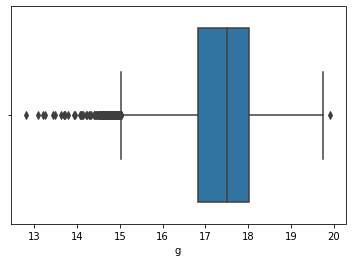

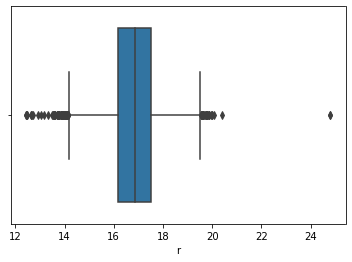

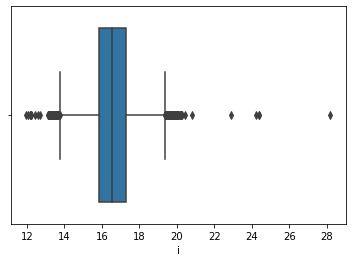

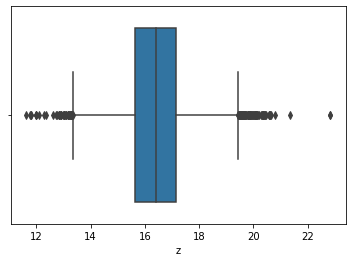

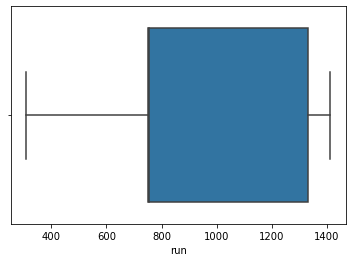

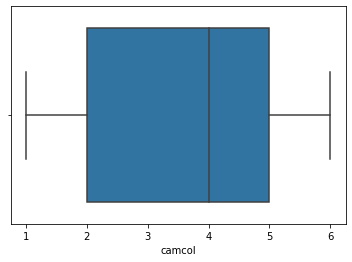

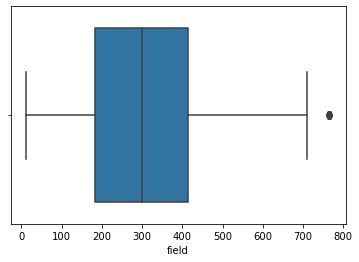

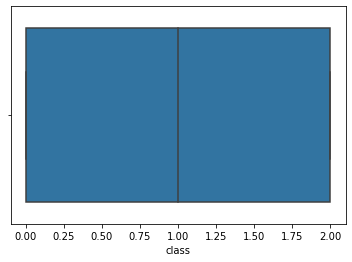

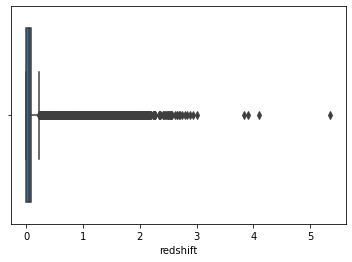

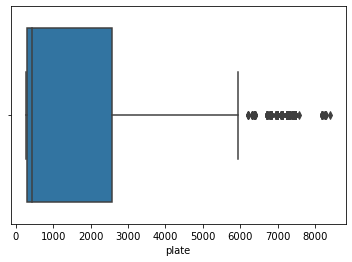

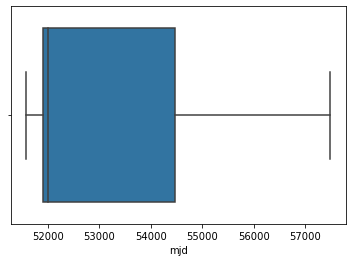

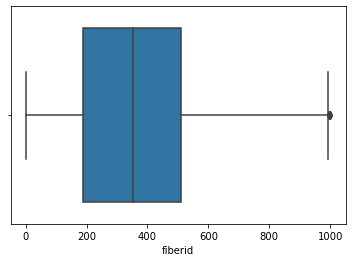

In [57]:
# Checking for Outliers
for l in sd.columns:
    sns.boxplot(sd[l])
    plt.show()

In [59]:
# checking skewness.
sd.skew()

ra         -1.227350
dec         1.191544
u          -1.219795
g          -0.536293
r          -0.021673
i           0.286442
z           0.214313
run         0.412555
camcol     -0.100220
field       0.249795
class       0.169292
redshift    4.265729
plate       1.794609
mjd         1.039610
fiberid     0.308053
dtype: float64

In [63]:
#Treating skewness using Powertransform
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
for i in sd.skew().index:
    if sd.skew().loc[i]>0.55:
        sd[i]=pt.fit_transform(sd[i].values.reshape(-1,1))
    if sd.skew().loc[i]<-0.55:
        sd[i]=pt.fit_transform(sd[i].values.reshape(-1,1))
    else:
        sd[i]=sd[i]

In [64]:
sd.skew()

ra         -0.154576
dec        -0.483246
u          -0.230857
g          -0.536293
r          -0.021673
i           0.286442
z           0.214313
run         0.412555
camcol     -0.100220
field       0.249795
class       0.169292
redshift    0.858765
plate       0.404242
mjd         0.939098
fiberid     0.308053
dtype: float64

In [66]:
sd

ra       dec         u         g         r         i         z  \
0     0.074086 -0.298528  1.324181  17.04240  15.94699  15.50342  15.22531   
1     0.075736 -0.286965 -0.203686  17.21449  16.67637  16.48922  16.39150   
2     0.077749 -0.289243  1.112203  18.19169  17.47428  17.08732  16.80125   
3     0.082435 -0.308940 -1.190591  16.60272  16.16116  15.98233  15.90438   
4     0.082749 -0.295227 -1.352749  16.26342  16.43869  16.55492  16.61326   
...        ...       ...       ...       ...       ...       ...       ...   
9995 -1.071857  1.336087  0.031851  17.47053  16.91508  16.68305  16.50570   
9996 -1.072055  1.337599 -0.703598  17.43849  17.07692  16.71661  16.69897   
9997 -1.067315  1.337549 -0.061450  17.77784  17.51872  17.43302  17.42048   
9998 -1.068766  1.338535  0.137848  17.91068  17.53152  17.36284  17.13988   
9999 -1.065149  1.339132  0.877519  17.37829  16.30542  15.83548  15.50588   

       run  camcol  field  class  redshift     plate       mjd  fiberid  
0      752       4    267      2 -0.938967  1.326782  1.338791      491  
1      752       4    267      2 -0.940055 -0.806801 -0.924403      541  
2      752       4    268      0  0.939831 -1.017960 -0.621582      513  
3      752       4    269      2 -0.941375  1.326782  1.338791      510  
4      752       4    269      2 -0.924806  1.326782  1.338791      512  
...    ...     ...    ...    ...       ...       ...       ...      ...  
9995  1345       3    161      0 -0.352316 -0.299123 -0.717210      246  
9996  1345       3    162      0  0.889145 -0.299123 -0.717210      228  
9997  1345       3    162      2 -0.948280  1.585300  2.518202      622  
9998  1345       3    163      0 -0.624694 -0.299123 -0.717210      229  
9999  1345       3    163      0  0.895373 -0.299123 -0.717210      233  

[10000 rows x 15 columns]

In [67]:
#Removing outliers using Zscore
from scipy.stats import zscore


In [69]:
z=np.abs(zscore(sd))
z

array([[0.07408641, 0.29852842, 1.32418059, ..., 1.32678164, 1.34394732,
        0.66863177],
       [0.07573554, 0.28696465, 0.20368564, ..., 0.80680079, 0.91927715,
        0.91101156],
       [0.07774912, 0.28924255, 1.11220308, ..., 1.01795982, 0.61645134,
        0.77527888],
       ...,
       [1.06731453, 1.33754889, 0.06145018, ..., 1.58529981, 2.52337416,
        1.3036668 ],
       [1.06876571, 1.33853454, 0.13784767, ..., 0.29912303, 0.71208055,
        0.60143828],
       [1.06514946, 1.33913207, 0.87751907, ..., 0.29912303, 0.71208055,
        0.5820479 ]])

In [81]:
threshold=3
space=sd[(z<3).all(axis=1)]

In [82]:
space

ra       dec         u         g         r         i         z  \
0     0.074086 -0.298528  1.324181  17.04240  15.94699  15.50342  15.22531   
1     0.075736 -0.286965 -0.203686  17.21449  16.67637  16.48922  16.39150   
2     0.077749 -0.289243  1.112203  18.19169  17.47428  17.08732  16.80125   
3     0.082435 -0.308940 -1.190591  16.60272  16.16116  15.98233  15.90438   
4     0.082749 -0.295227 -1.352749  16.26342  16.43869  16.55492  16.61326   
...        ...       ...       ...       ...       ...       ...       ...   
9995 -1.071857  1.336087  0.031851  17.47053  16.91508  16.68305  16.50570   
9996 -1.072055  1.337599 -0.703598  17.43849  17.07692  16.71661  16.69897   
9997 -1.067315  1.337549 -0.061450  17.77784  17.51872  17.43302  17.42048   
9998 -1.068766  1.338535  0.137848  17.91068  17.53152  17.36284  17.13988   
9999 -1.065149  1.339132  0.877519  17.37829  16.30542  15.83548  15.50588   

       run  camcol  field  class  redshift     plate       mjd  fiberid  
0      752       4    267      2 -0.938967  1.326782  1.338791      491  
1      752       4    267      2 -0.940055 -0.806801 -0.924403      541  
2      752       4    268      0  0.939831 -1.017960 -0.621582      513  
3      752       4    269      2 -0.941375  1.326782  1.338791      510  
4      752       4    269      2 -0.924806  1.326782  1.338791      512  
...    ...     ...    ...    ...       ...       ...       ...      ...  
9995  1345       3    161      0 -0.352316 -0.299123 -0.717210      246  
9996  1345       3    162      0  0.889145 -0.299123 -0.717210      228  
9997  1345       3    162      2 -0.948280  1.585300  2.518202      622  
9998  1345       3    163      0 -0.624694 -0.299123 -0.717210      229  
9999  1345       3    163      0  0.895373 -0.299123 -0.717210      233  

[9774 rows x 15 columns]

In [95]:
print('before removing outliers shape was:', sd.shape, '\n', 'after removing outliers shape is: ',space.shape)
print('▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣')

before removing outliers shape was: (10000, 15) 
 after removing outliers shape is:  (9774, 15)
▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣▣


In [96]:
x=space.drop(['class'],axis=1)

In [97]:
x

ra       dec         u         g         r         i         z  \
0     0.074086 -0.298528  1.324181  17.04240  15.94699  15.50342  15.22531   
1     0.075736 -0.286965 -0.203686  17.21449  16.67637  16.48922  16.39150   
2     0.077749 -0.289243  1.112203  18.19169  17.47428  17.08732  16.80125   
3     0.082435 -0.308940 -1.190591  16.60272  16.16116  15.98233  15.90438   
4     0.082749 -0.295227 -1.352749  16.26342  16.43869  16.55492  16.61326   
...        ...       ...       ...       ...       ...       ...       ...   
9995 -1.071857  1.336087  0.031851  17.47053  16.91508  16.68305  16.50570   
9996 -1.072055  1.337599 -0.703598  17.43849  17.07692  16.71661  16.69897   
9997 -1.067315  1.337549 -0.061450  17.77784  17.51872  17.43302  17.42048   
9998 -1.068766  1.338535  0.137848  17.91068  17.53152  17.36284  17.13988   
9999 -1.065149  1.339132  0.877519  17.37829  16.30542  15.83548  15.50588   

       run  camcol  field  redshift     plate       mjd  fiberid  
0      752       4    267 -0.938967  1.326782  1.338791      491  
1      752       4    267 -0.940055 -0.806801 -0.924403      541  
2      752       4    268  0.939831 -1.017960 -0.621582      513  
3      752       4    269 -0.941375  1.326782  1.338791      510  
4      752       4    269 -0.924806  1.326782  1.338791      512  
...    ...     ...    ...       ...       ...       ...      ...  
9995  1345       3    161 -0.352316 -0.299123 -0.717210      246  
9996  1345       3    162  0.889145 -0.299123 -0.717210      228  
9997  1345       3    162 -0.948280  1.585300  2.518202      622  
9998  1345       3    163 -0.624694 -0.299123 -0.717210      229  
9999  1345       3    163  0.895373 -0.299123 -0.717210      233  

[9774 rows x 14 columns]

In [98]:
# scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
mnm=MinMaxScaler()

In [99]:
xx=mnm.fit_transform(x)
x=pd.DataFrame(xx,columns=x.columns)
x

ra       dec         u         g         r         i         z  \
0     0.542289  0.550375  0.918780  0.480707  0.363409  0.336721  0.334290   
1     0.542634  0.553250  0.522129  0.513851  0.481644  0.482863  0.496166   
2     0.543055  0.552684  0.863748  0.702055  0.610987  0.571529  0.553043   
3     0.544035  0.547787  0.265917  0.396026  0.398127  0.407718  0.428550   
4     0.544101  0.551196  0.223819  0.330679  0.443115  0.492602  0.526948   
...        ...       ...       ...       ...       ...       ...       ...   
9769  0.302607  0.956773  0.583277  0.563163  0.520339  0.511597  0.512018   
9770  0.302565  0.957149  0.392346  0.556992  0.546574  0.516572  0.538845   
9771  0.303557  0.957137  0.559055  0.622349  0.618190  0.622778  0.638996   
9772  0.303253  0.957382  0.610795  0.647934  0.620265  0.612374  0.600047   
9773  0.304010  0.957530  0.802822  0.545398  0.421512  0.385948  0.373235   

           run  camcol     field  redshift     plate       mjd   fiberid  
0     0.402174     0.6  0.338177  0.028690  0.894766  0.618026  0.505676  
1     0.402174     0.6  0.338177  0.028376  0.127708  0.008584  0.557276  
2     0.402174     0.6  0.339498  0.571046  0.051793  0.090129  0.528380  
3     0.402174     0.6  0.340819  0.027994  0.894766  0.618026  0.525284  
4     0.402174     0.6  0.340819  0.032777  0.894766  0.618026  0.527348  
...        ...     ...       ...       ...       ...       ...       ...  
9769  0.939312     0.4  0.198151  0.198040  0.310226  0.064378  0.252838  
9770  0.939312     0.4  0.199472  0.556415  0.310226  0.064378  0.234262  
9771  0.939312     0.4  0.199472  0.026001  0.987707  0.935622  0.640867  
9772  0.939312     0.4  0.200793  0.119411  0.310226  0.064378  0.235294  
9773  0.939312     0.4  0.200793  0.558213  0.310226  0.064378  0.239422  

[9774 rows x 14 columns]

In [100]:
x.skew()

ra         -0.113287
dec         0.121492
u          -0.223501
g          -0.448941
r          -0.048617
i           0.109548
z           0.193688
run         0.422596
camcol     -0.083770
field       0.230588
redshift    0.842036
plate       0.428688
mjd         0.955504
fiberid     0.242015
dtype: float64

In [102]:
y=space['class']
y

0       2
1       2
2       0
3       2
4       2
       ..
9995    0
9996    0
9997    2
9998    0
9999    0
Name: class, Length: 9774, dtype: int32

In [106]:
#Modelling the data
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
list=[MultinomialNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier()]
for j in list:
    r_max=0
    print('for the algorithm: ',j)
    for i in range(33,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
        j.fit(x_train,y_train)
        pred=j.predict(x_test)
        accuracy=accuracy_score(pred,y_test)
        print('accuracy score corresponding to random state',i,'is: ',accuracy)
        if accuracy>r_max:
            r_max=accuracy
            final=i
    print('\n')
    print('Max accuracy score corresponding to: ', final,'is: ',r_max)
    print('⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣⍣')
    print('\n')

for the algorithm:  MultinomialNB()
accuracy score corresponding to random state 33 is:  0.8012274122059325
accuracy score corresponding to random state 34 is:  0.8073644732355949
accuracy score corresponding to random state 35 is:  0.8080463689055575
accuracy score corresponding to random state 36 is:  0.7981588816911013
accuracy score corresponding to random state 37 is:  0.8025912035458574
accuracy score corresponding to random state 38 is:  0.801909307875895
accuracy score corresponding to random state 39 is:  0.8056597340606887
accuracy score corresponding to random state 40 is:  0.8053187862257075
accuracy score corresponding to random state 41 is:  0.793726559836345
accuracy score corresponding to random state 42 is:  0.8097511080804637
accuracy score corresponding to random state 43 is:  0.8036140470508012
accuracy score corresponding to random state 44 is:  0.8070235254006137
accuracy score corresponding to random state 45 is:  0.8049778383907262
accuracy score corresponding t

Note: SVC is working best with accuracy score of 0.99 at random state 36.

In [107]:
# Using ensemble techniques to boost up our score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
list=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier()]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
for m in list:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predict=m.predict(x_test)
    print('Score of :',m,"is:",score)
    print('Accuracy score of:',m,'is:',accuracy_score(predict,y_test))
    print('Confusion matrix of:',m,'is:\n',confusion_matrix(predict,y_test))
    print('Classification report of:',m,'is: \n',classification_report(predict,y_test))
    print('\n')

Score of : RandomForestClassifier() is: 1.0
Accuracy score of: RandomForestClassifier() is: 0.9901125127855438
Confusion matrix of: RandomForestClassifier() is:
 [[1481   11    1]
 [   7  223    0]
 [   9    1 1200]]
Classification report of: RandomForestClassifier() is: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1493
           1       0.95      0.97      0.96       230
           2       1.00      0.99      1.00      1210

    accuracy                           0.99      2933
   macro avg       0.98      0.98      0.98      2933
weighted avg       0.99      0.99      0.99      2933



Score of : AdaBoostClassifier() is: 0.6022511328753106
Accuracy score of: AdaBoostClassifier() is: 0.616092737811115
Confusion matrix of: AdaBoostClassifier() is:
 [[1358  209  777]
 [ 137   25    0]
 [   2    1  424]]
Classification report of: AdaBoostClassifier() is: 
               precision    recall  f1-score   support

           0    

Random Forest Classifier is performing better than others with an accuracy score of 0.9901 also f1 score for it is 1.  
Random Forest doesnt overfit easily. 
Now moving further with random forest classifier  and applying GridSearchCV to find out the best parameters.

In [108]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
rnc=RandomForestClassifier()
parameters={ 'random_state': range(33,55),
           'criterion':['gini','entropy']
           }
cv=GridSearchCV(rnc,parameters)
cv.fit(x,y)
print(cv.best_params_)

{'criterion': 'entropy', 'random_state': 39}


In [109]:
# Using criterion entropy and random state 39 lets run our model.

rf=RandomForestClassifier(criterion='entropy',random_state=39)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
rf.fit(x_train,y_train)
score=rf.score(x_train,y_train)
predict=rf.predict(x_test)
print('Score of is:',score)
print('Accuracy score is:',accuracy_score(predict,y_test))
print('Confusion matrix is:\n',confusion_matrix(predict,y_test))
print('Classification report is: \n',classification_report(predict,y_test))

Score of is: 1.0
Accuracy score is: 0.9901125127855438
Confusion matrix is:
 [[1482   12    1]
 [   6  222    0]
 [   9    1 1200]]
Classification report is: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1495
           1       0.94      0.97      0.96       228
           2       1.00      0.99      1.00      1210

    accuracy                           0.99      2933
   macro avg       0.98      0.99      0.98      2933
weighted avg       0.99      0.99      0.99      2933



In [113]:
# applying cross validation to the best model to see if it is under fitting or over fitting
from sklearn.model_selection import cross_val_score
cv=cross_val_score(rf,x,y,cv=8)
print('The cross validation score is: ',cv)
print('The mean and standard deviations are: ',cv.mean(),cv.std())

The cross validation score is:  [0.99018003 0.98854337 0.99263502 0.99018003 0.99018003 0.98363339
 0.98853399 0.98689599]
The mean and standard deviations are:  0.9888477321987961 0.0025213692786585393


In [114]:
#Saving the best model- Random forest classifier

import joblib
joblib.dump(rf,'space_server.pkl')

['space_server.pkl']